In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
dataset_path = "./data/titanic_modified_dataset.csv"
df = pd.read_csv(dataset_path, index_col="PassengerId")
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


In [28]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [29]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

X.shape

(891, 8)

In [30]:
intercept = np.ones((X.shape[0], 1))

X_b = np.hstack((intercept, X))

print(X_b.shape)

(891, 9)


In [31]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y, train_size=(1 - val_size), random_state=random_state, shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle,
)

print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of val samples: {X_val.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}")

Number of training samples: 623
Number of val samples: 179
Number of test samples: 89


In [32]:
# Normalization

normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [42]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


# Hypothesis function
def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat


# Binary Cross-entropy loss function
def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()


# Gradient function
def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size


# Update theta
def update_theta(theta, gradient, lr):
    return theta - lr * gradient


def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

In [ ]:
# Training
lr = 0.005
epochs = 100
batch_size = 32

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i : i + batch_size]
        y_i = y_train[i : i + batch_size]

        y_hat = predict(X_i, theta)

        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)

        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(
        f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}"
    )


EPOCH 1:	Training loss: 0.725	Validation loss: 0.604

EPOCH 2:	Training loss: 0.716	Validation loss: 0.599

EPOCH 3:	Training loss: 0.706	Validation loss: 0.594

EPOCH 4:	Training loss: 0.697	Validation loss: 0.589

EPOCH 5:	Training loss: 0.688	Validation loss: 0.585

EPOCH 6:	Training loss: 0.679	Validation loss: 0.580

EPOCH 7:	Training loss: 0.671	Validation loss: 0.576

EPOCH 8:	Training loss: 0.663	Validation loss: 0.573

EPOCH 9:	Training loss: 0.655	Validation loss: 0.569

EPOCH 10:	Training loss: 0.647	Validation loss: 0.565

EPOCH 11:	Training loss: 0.640	Validation loss: 0.562

EPOCH 12:	Training loss: 0.633	Validation loss: 0.558

EPOCH 13:	Training loss: 0.626	Validation loss: 0.555

EPOCH 14:	Training loss: 0.619	Validation loss: 0.552

EPOCH 15:	Training loss: 0.613	Validation loss: 0.549

EPOCH 16:	Training loss: 0.607	Validation loss: 0.547

EPOCH 17:	Training loss: 0.601	Validation loss: 0.544

EPOCH 18:	Training loss: 0.595	Validation loss: 0.542

EPOCH 19:	Training

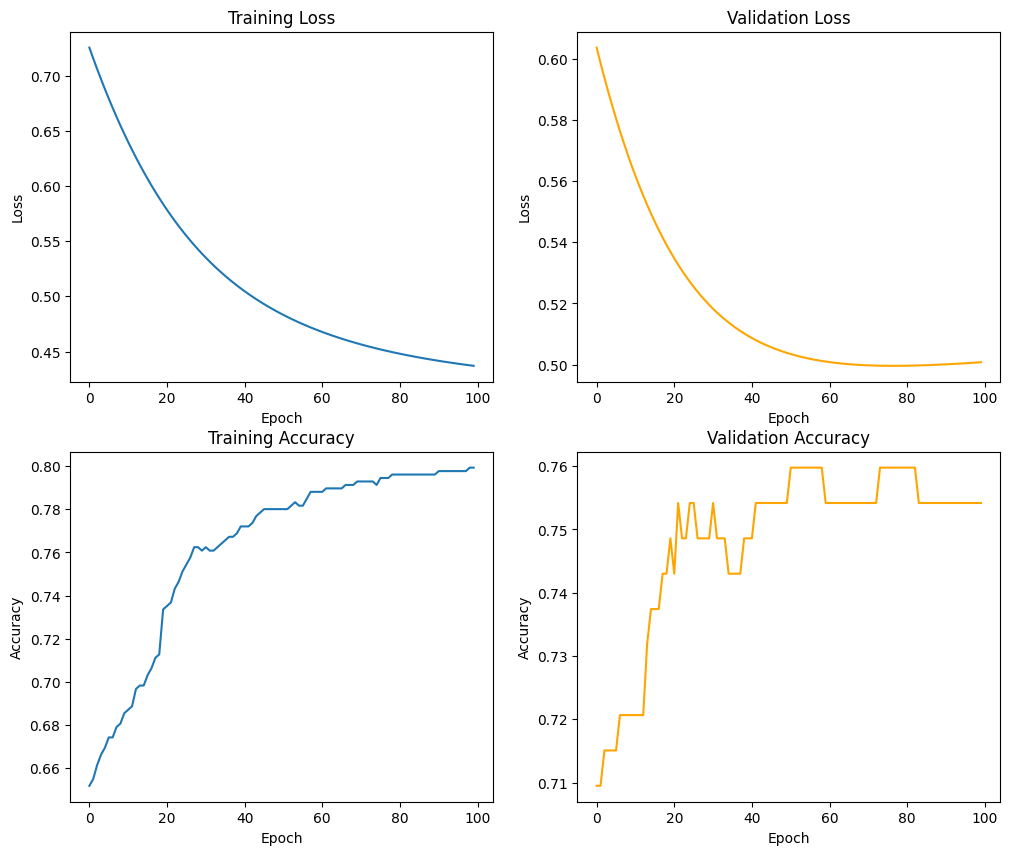

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel="Epoch", ylabel="Loss")
ax[0, 0].set_title("Training Loss")

ax[0, 1].plot(val_losses, "orange")
ax[0, 1].set(xlabel="Epoch", ylabel="Loss")
ax[0, 1].set_title("Validation Loss")

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel="Epoch", ylabel="Accuracy")
ax[1, 0].set_title("Training Accuracy")

ax[1, 1].plot(val_accs, "orange")
ax[1, 1].set(xlabel="Epoch", ylabel="Accuracy")
ax[1, 1].set_title("Validation Accuracy")

plt.show()

In [45]:
# Evaluation
val_set_acc = compute_accuracy(X_val, y_val, theta)
print("Evaluation on validation set:")
print(f"Accuracy: {val_set_acc}")

Evaluation on validation set:
Accuracy: 0.7541899441340782


In [46]:
# Test set
test_set_acc = compute_accuracy(X_test, y_test, theta)
print("Evaluation on test set:")
print(f"Accuracy: {test_set_acc}")

Evaluation on test set:
Accuracy: 0.7528089887640449
